In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
sequence_length = 400
embed_dim = 128
n = 10000

encodings = np.zeros((sequence_length, embed_dim))
for pos in range(sequence_length):
    for i in range(int(embed_dim/2)):
        denominator = n ** ((2*i) / (embed_dim))
        encodings[pos, 2*i] = np.sin(pos / denominator)
        encodings[pos, 2*i + 1] = np.cos(pos / denominator)
        
encodings = np.swapaxes(encodings, 0, 1)
encodings.shape

(128, 400)

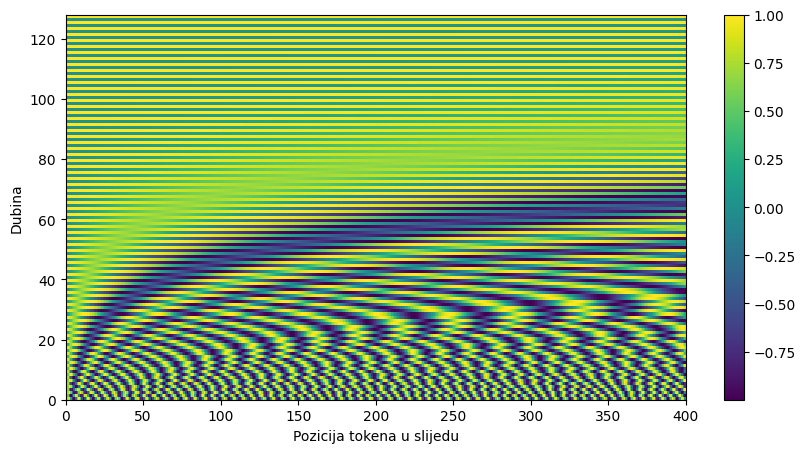

In [30]:
plt.figure(figsize=(10,5))
plt.pcolormesh(encodings, cmap='viridis')
plt.colorbar()
plt.xlabel('Pozicija tokena u slijedu')
plt.ylabel('Dubina')
plt.show()

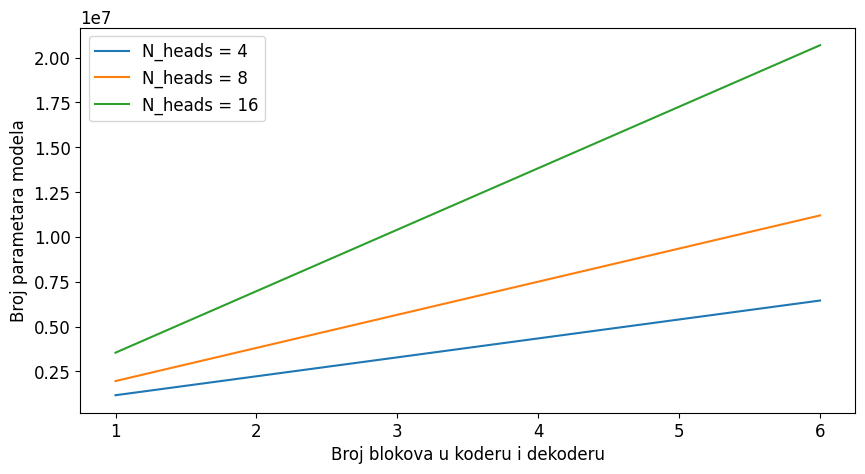

In [20]:
### PARAMETRI OVISNO O GLAVAMA ###
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

x = range(1, 7, 1)
h4 = [1173821, 2229949, 3286077, 4342205, 5398333, 6454461]
h8 = [1964861, 3812029, 5659197, 7506365, 9353533, 11200701]
h16 = [3546941, 6976189, 10405437, 13834685, 17263933, 20693181]

plt.figure(figsize=(10,5))
plt.plot(x, h4, label = 'N_heads = 4')
plt.plot(x, h8, label = 'N_heads = 8')
plt.plot(x, h16, label = 'N_heads = 16')
plt.xlabel('Broj blokova u koderu i dekoderu')
plt.ylabel('Broj parametara modela')
plt.legend()

#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.ticklabel_format(style='sci', axis='y')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

x = range(1, 7, 1)
h4 = [1173821, 2229949, 3286077, 4342205, 5398333, 6454461]
h8 = [1964861, 3812029, 5659197, 7506365, 9353533, 11200701]
h16 = [3546941, 6976189, 10405437, 13834685, 17263933, 20693181]

plt.figure(figsize=(10,5))
plt.plot(x, h4, label = '4 glave')
plt.plot(x, h8, label = '8 glava')
plt.plot(x, h16, label = '16 glava')
plt.xlabel('Broj blokova u koderu i dekoderu')
plt.ylabel('Broj parametara modela')
plt.legend()

#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.ticklabel_format(style='sci', axis='y')

plt.show()

In [17]:
### ČITANJE ONIH FILEOVA ###
path = 'C:/Users/Ivan/Desktop/CODE/models/EXCEL/'
files = ['5.out', '12.out', '19.out', '6.out', '13.out', '20.out']

values = []
for file in files:
    dict = {}
    
    with open(path + file, 'r') as f:
        lines = f.readlines()
        
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    for line in lines:
        if 'loss' in line:
            split = line.strip('\n').split(' ')
            train_loss.append(float(split[split.index('loss:') + 1]))
            train_acc.append(float(split[split.index('accuracy_function:') + 1]))
            val_loss.append(float(split[split.index('val_loss:') + 1]))
            val_acc.append(float(split[split.index('val_accuracy_function:') + 1]))
            
    dict['tloss'] = train_loss
    dict['tacc'] = train_acc
    dict['vloss'] = val_loss
    dict['vacc'] = val_acc
    
    values.append(dict)

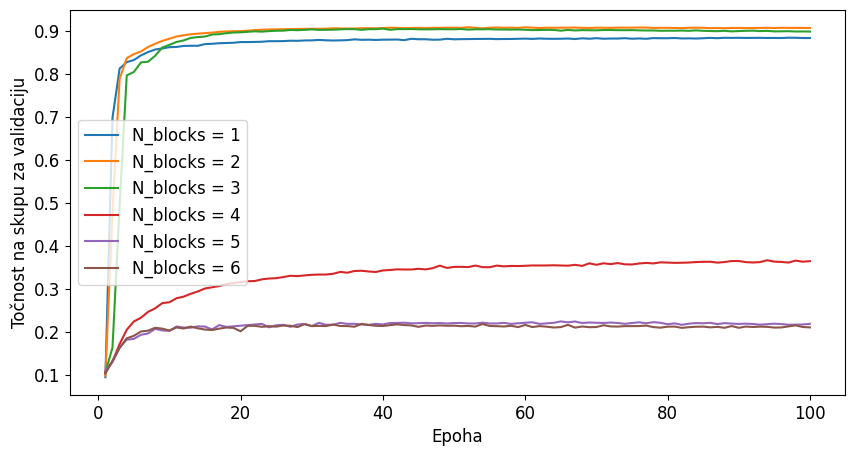

In [24]:
### LOSS NA SKUPU ZA TRENIRANJE ###

x = range(1, 101, 1)

plt.figure(figsize=(10,5))
for i, dict in enumerate(values):
    plt.plot(x, dict['vacc'], label = 'N_blocks = ' + str(i+1))

plt.xlabel('Epoha')
plt.ylabel('Točnost na skupu za validaciju')
plt.legend()

plt.show()

In [39]:
### ČITANJE NAJBOLJIH REZULTATA ###
path = 'C:/Users/Ivan/Desktop/CODE/models/EXCEL/'
files = ['5.out', '12.out', '19.out', 
         '6.out', '13.out', '20.out',
         '7.out', '14.out', '21.out',
         '8.out', '15.out', '22.out']

values = []
for file in files:
    
    with open(path + file, 'r') as f:
        lines = f.readlines()
        
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    for line in lines:
        if 'loss' in line:
            split = line.strip('\n').split(' ')
            train_loss.append(float(split[split.index('loss:') + 1]))
            train_acc.append(float(split[split.index('accuracy_function:') + 1]))
            val_loss.append(float(split[split.index('val_loss:') + 1]))
            val_acc.append(float(split[split.index('val_accuracy_function:') + 1]))
            
    
    values.append(max(val_acc))

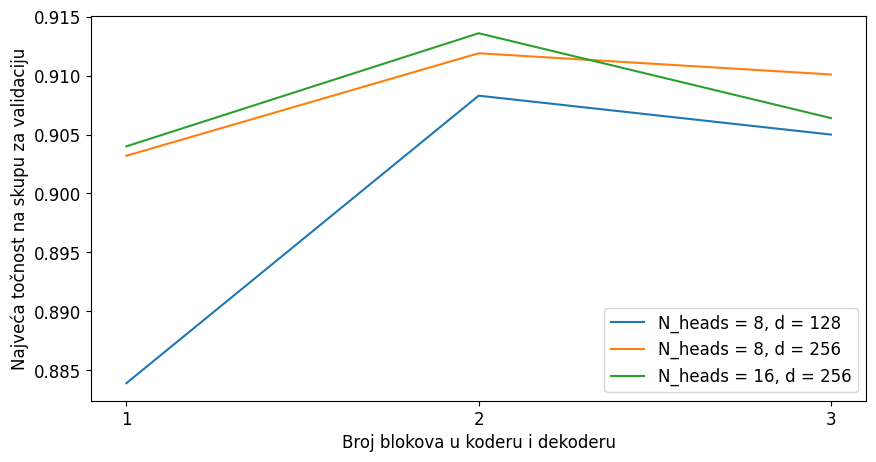

In [46]:
x = range(1, 4, 1)
y1 = values[:3]
y2 = values[3:6]
y3 = values[6:9]
y4 = values[9:12]

plt.figure(figsize=(10,5))
plt.plot(x, y1, label = 'N_heads = 8, d = 128')
plt.plot(x, y2, label = 'N_heads = 8, d = 256')
#plt.plot(x, y3, label = 'N_heads = 16, d = 128')
plt.plot(x, y4, label = 'N_heads = 16, d = 256')

plt.xlabel('Broj blokova u koderu i dekoderu')
plt.ylabel('Najveća točnost na skupu za validaciju')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.show()

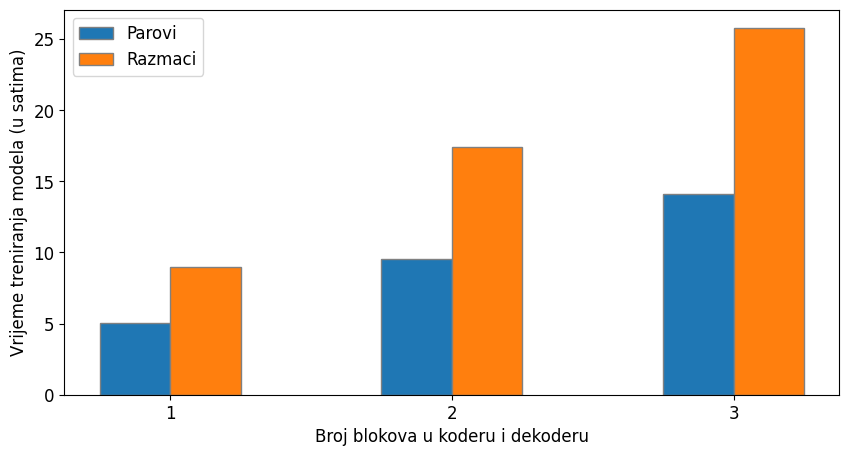

In [73]:
import matplotlib.pyplot as plt
import numpy as np
 
# set width of bar
barWidth = 0.25
plt.figure(figsize=(10,5))
 
# set height of bar
IT = [5.05, 9.55, 14.08]
ECE = [9, 17.44, 25.78]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT,  width = barWidth,
        edgecolor ='grey', label ='Parovi')
plt.bar(br2, ECE, width = barWidth,
        edgecolor ='grey', label ='Razmaci')
 
# Adding Xticks
plt.xlabel('Broj blokova u koderu i dekoderu')
plt.ylabel('Vrijeme treniranja modela (u satima)')
plt.xticks([r + barWidth - 0.125 for r in range(len(IT))],
        ['1', '2', '3'])
 
plt.legend()
plt.show()

In [69]:
### ČITANJE NAJBOLJIH REZULTATA ###
path = 'C:/Users/Ivan/Desktop/CODE/models/EXCEL/'
files = ['5.out', '12.out', '19.out', 'spaces_l1h8d128.out', 'spaces_l2h8d128.out', 'spaces_l3h8d128.out']

values = []
for file in files:
    
    with open(path + file, 'r') as f:
        lines = f.readlines()
        
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    for line in lines:
        if 'loss' in line:
            split = line.strip('\n').split(' ')
            train_loss.append(float(split[split.index('loss:') + 1]))
            train_acc.append(float(split[split.index('accuracy_function:') + 1]))
            val_loss.append(float(split[split.index('val_loss:') + 1]))
            val_acc.append(float(split[split.index('val_accuracy_function:') + 1]))
            
    
    values.append(min(val_loss))

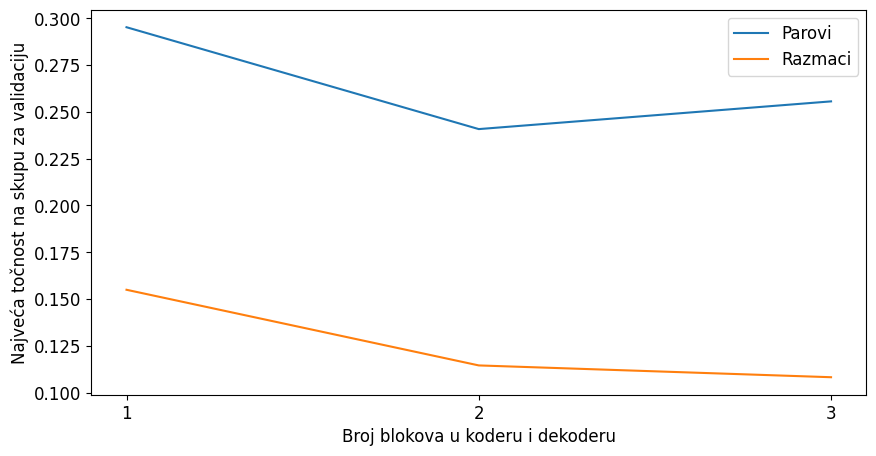

In [70]:
x = range(1, 4, 1)
y1 = values[:3]
y2 = values[3:]

plt.figure(figsize=(10,5))
plt.plot(x, y1, label = 'Parovi')
plt.plot(x, y2, label = 'Razmaci')

plt.xlabel('Broj blokova u koderu i dekoderu')
plt.ylabel('Najveća točnost na skupu za validaciju')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.show()

In [71]:
### ČITANJE ONIH FILEOVA ###
path = 'C:/Users/Ivan/Desktop/CODE/models/EXCEL/'
files = ['5.out', '12.out', '19.out', 'spaces_l1h8d128.out', 'spaces_l2h8d128.out', 'spaces_l3h8d128.out']
values = []
for file in files:
    dict = {}
    
    with open(path + file, 'r') as f:
        lines = f.readlines()
        
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    
    for line in lines:
        if 'loss' in line:
            split = line.strip('\n').split(' ')
            train_loss.append(float(split[split.index('loss:') + 1]))
            train_acc.append(float(split[split.index('accuracy_function:') + 1]))
            val_loss.append(float(split[split.index('val_loss:') + 1]))
            val_acc.append(float(split[split.index('val_accuracy_function:') + 1]))
            
    dict['tloss'] = train_loss
    dict['tacc'] = train_acc
    dict['vloss'] = val_loss
    dict['vacc'] = val_acc
    
    values.append(dict)

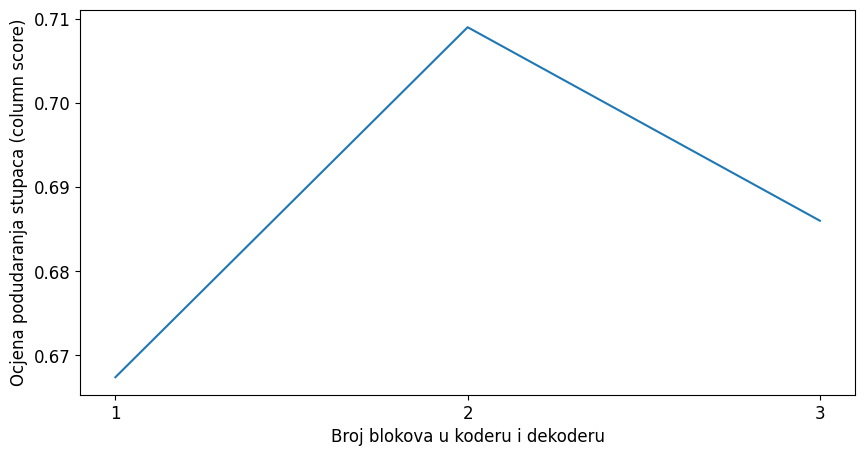

In [76]:
x = range(1, 4, 1)
y1 = [0.66741, 0.70899, 0.68600]

plt.figure(figsize=(10,5))

plt.plot(x, y1)

plt.xlabel('Broj blokova u koderu i dekoderu')
plt.ylabel('Ocjena podudaranja stupaca (column score)')
plt.xticks([1, 2, 3], [1, 2, 3])
plt.show()